In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import PandasTools, Descriptors

### Hit 1

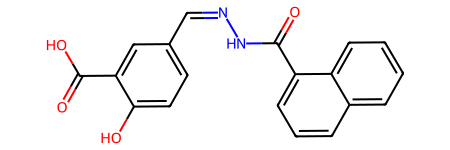

In [3]:
HIPS6459 = r"O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O"
mol = Chem.MolFromSmiles(HIPS6459)
# Default
display(mol)

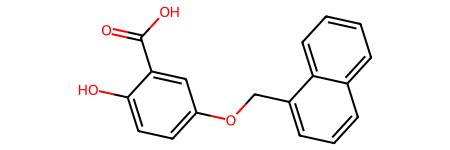

In [4]:
### Reference ligand
HIPS6790 = r"O=C(O)c1cc(/OCc2cccc3ccccc23)ccc1O"
mol = Chem.MolFromSmiles(HIPS6790)
# Default
display(mol)

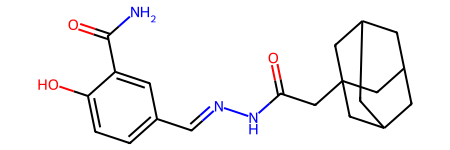

In [5]:
HIPS6897 = 'NC(=O)c1cc(/C=N/NC(=O)CC23CC4CC(CC(C4)C2)C3)ccc1O'

mol = Chem.MolFromSmiles(HIPS6897)
# Default
mol

### Hit 2

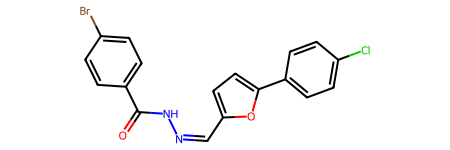

In [6]:
HIPS6706 = 'O=C(N/N=C\c1ccc(-c2ccc(Cl)cc2)o1)c1ccc(Br)cc1'
mol = Chem.MolFromSmiles(HIPS6706)
# Default
mol

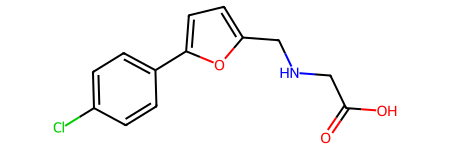

In [7]:
HIPS7216 = 'C1=CC(=CC=C1C2=CC=C(O2)CNCC(=O)O[H])Cl'

mol = Chem.MolFromSmiles(HIPS7216)
# Default
mol

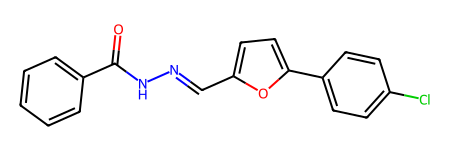

In [8]:
HIPS7857 = 'O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3=CC=CC=C3'

mol = Chem.MolFromSmiles(HIPS7857)
# Default
mol

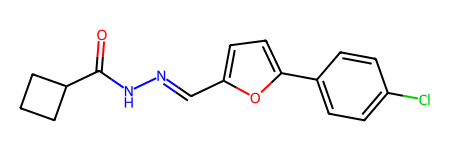

In [9]:
HIPS7912 = 'O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3CCC3'

mol = Chem.MolFromSmiles(HIPS7912)
# Default
mol

In [10]:
hit1 = [HIPS6459, HIPS6790, HIPS6897]
hit1name = ['HIPS6459', 'HIPS6790', 'HIPS6897']
hit1_inh_250 = [72.5,34,43.4]
hit1_ic_50 = [308 , 315 , 99.5 ] 
hit1_inh_200 = [11.6, 42.7 , 81.3]

In [11]:
hit2 = [HIPS6706 , HIPS7216, HIPS7857, HIPS7912]
hit2name = ['HIPS6706' , 'HIPS7216', 'HIPS7857', 'HIPS7912']
hit2_inh_250 = [85.8, 1200, 52.2 , "unknown"]
hit2_ic_50 = [152.8, "unknown",56 , "unknown" ]
hit2_inh_200 = [59.5 , 10000 , 68.5, "unknown"]

In [12]:
allhits = hit1 + hit2
allhitsname = hit1name + hit2name

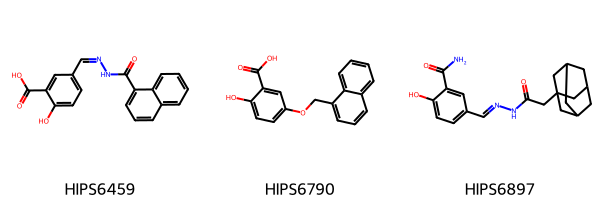

In [13]:
from PIL import Image
mol_list = [Chem.MolFromSmiles(smiles) for smiles in hit1]
img = Draw.MolsToGridImage(mol_list, molsPerRow=3, legends=hit1name, returnPNG=True)
img

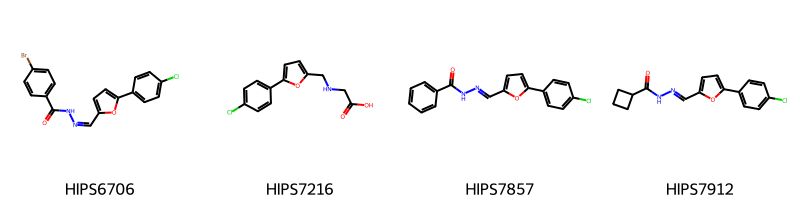

In [14]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in hit2]
img = Draw.MolsToGridImage(mol_list,molsPerRow=4, legends=hit2name)
img

In [15]:
df_hit1 = pd.DataFrame({'ID': hit1name ,'IC50' : hit1_ic_50, '% Inh@200 μM ': hit1_inh_200,"% Inh@250 μM" : hit1_inh_250, 'smiles':hit1, 'Molecule': [Chem.MolFromSmiles(smiles) for smiles in hit1]})

display(df_hit1)

PandasTools.WriteSDF(df_hit1, 'data/ligands/hit_one.sdf',idName="ID", molColName='Molecule', properties=df_hit1.columns)


ID   IC50  % Inh@200 μM   % Inh@250 μM  \
0  HIPS6459  308.0           11.6          72.5   
1  HIPS6790  315.0           42.7          34.0   
2  HIPS6897   99.5           81.3          43.4   

                                              smiles  \
0         O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O   
1                 O=C(O)c1cc(/OCc2cccc3ccccc23)ccc1O   
2  NC(=O)c1cc(/C=N/NC(=O)CC23CC4CC(CC(C4)C2)C3)ccc1O   

                                           Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50120>  
1  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50190>  
2  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50200>

In [16]:
df_hit2 = pd.DataFrame({'ID': hit2name ,'IC50' : hit2_ic_50, '% Inh@200 μM ': hit2_inh_200,"% Inh@250 μM" : hit2_inh_250, 'smiles':hit2, 'Molecule': [Chem.MolFromSmiles(smiles) for smiles in hit2]})

display(df_hit2)

PandasTools.WriteSDF(df_hit2, 'data/ligands/hit_two.sdf',idName="ID", molColName='Molecule', properties=df_hit2.columns)

ID     IC50 % Inh@200 μM  % Inh@250 μM  \
0  HIPS6706    152.8          59.5         85.8   
1  HIPS7216  unknown         10000         1200   
2  HIPS7857       56          68.5         52.2   
3  HIPS7912  unknown       unknown      unknown   

                                           smiles  \
0   O=C(N/N=C\c1ccc(-c2ccc(Cl)cc2)o1)c1ccc(Br)cc1   
1          C1=CC(=CC=C1C2=CC=C(O2)CNCC(=O)O[H])Cl   
2  O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3=CC=CC=C3   
3       O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3CCC3   

                                           Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50430>  
1  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb515b0>  
2  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb51620>  
3  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb51700>

In [17]:
from data_preparation import run_gypsumdl
#prepared_molecules_path1 = run_gypsumdl(f"data/ligands/hit_one.sdf", f"gypsum_dl_success_cleaned_hit1")
#prepared_molecules_path2 = run_gypsumdl(f"data/ligands/hit_two.sdf", f"gypsum_dl_success_cleaned_hit2")
#prepared_molecules_pathstereo = run_gypsumdl(f"data/ligands/stereoisomers.sdf", f"gypsum_dl_success_cleaned_stereoisomers")

In [18]:
from docking import gnina_docking

snapshot_ID = "A"
sdf_name = "docked_gnina_pose_A_hit2_64.sdf"
ref_file = f"data/{snapshot_ID}/ref_ligand.pdb"

#gnina_docking(snapshot_ID, sdf_name, prepared_molecules_path2, ref_file, "64")

# Visualizing possible interactions using PLIPIFY

In [1]:
from utility import split_sdf, create_2dposeview, plipify_ligand_protein_preparation, sdf_preprocessing
from pymol import cmd
import glob 
import os
from pathlib import Path
from pathlib import Path
from io import BytesIO
from zipfile import ZipFile
from subprocess import call, STDOUT
from urllib.request import urlopen
import glob 
from pymol import cmd, stored

import requests
from tqdm.auto import tqdm
from matplotlib import cm, colors
from IPython.display import Image
import pandas as pd
from rdkit.Chem.PandasTools import AddMoleculeColumnToFrame
from Bio.PDB import PDBParser, PDBIO
import nglview as nv

from plipify.fingerprints import InteractionFingerprint
from plipify.visualization import (
    fingerprint_barplot, fingerprint_heatmap, fingerprint_table, 
    fingerprint_nglview, PymolVisualizer, nglview_color_side_chains_by_frequency,
    fingerprint_writepdb
)
from plipify.core import Structure


HERE = Path(_dh[-1])
DATA = HERE / "dcc_data"
number_of_poses = 10
ligands_path = DATA / f"HIT_2_{number_of_poses}_POSES"


In [2]:
#convert sdf files to pdb files and give chain to ligand
sdf_files = list(ligands_path.glob("**/*.sdf"))
sdf_files[0].name

sdf_preprocessing(sdf_files)

In [3]:
# def plipify_ligand_protein_preparation(ligands_path, protein_path, protein_name):
#     ''''
#     This function loads ligands and protein using pymol script commands and save both protein and ligand as a complex as pdb file.
#     It merges Chain C and D to chain E and renumbers the residues in the new chain E, in order to avoid clashes with the protein residues.

#     Parameters:
#     ------------
#     ligands_path: path to folder containing ligands in sdf format
#     protein_path: path to protein in pdb format
#     protein_name: name of protein
    
#     Returns:
#     ------------
#     PDB file of ligand protein complex
#     '''
    
#     #load ligands as list of sdf files
#     ligand_files = list(ligands_path.glob("**/*.pdb"))

#     #create folder to save ligand protein complex
#     # if os.path.exists(ligands_path / "ligand_protein_complex"):
#     #     return
    
#     os.makedirs(ligands_path / "ligand_protein_complex", exist_ok=True)

#     #load protein and ligand and save as pdb file
#     for sdf in ligand_files:
        
#         ligand_name = sdf.stem
#         complex_name = f"{ligand_name}_{protein_name}.pdb"
#         pdb_output = ligands_path / "ligand_protein_complex" /complex_name


#         cmd.load(protein_path)
#         cmd.load(sdf, "LIG")
#         # select chain C and D


#         # renumber the residues in the new chain E
#         offset = 0
#         stored.residues = []
        
#         # Collect original residue ids for chain E
#         chains = ['C', 'D']
#         for chain_id in chains:
#             cmd.iterate(f"chain {chain_id} and name ca", "stored.residues.append(resi)")
#             print(stored.residues)
#             for i, old_resi in enumerate(stored.residues, start=1):
#                 cmd.alter(f"resi {old_resi} and chain {chain_id}", f"resi='{old_resi}{chain_id}'")

#         cmd.select('chain_CD', 'chain C+D')
#         #Change occupancy to 1.0
#         cmd.alter("all", "q=1.0")
#         # combine chains C and D into one chain (let's name it E for example)
#         cmd.alter('chain_CD', 'chain="E"')
#         cmd.select('only_chain_E', 'chain E')
#         cmd.save(pdb_output, 'only_chain_E') 
#         cmd.delete("all")

#         # open pdb file and remove line starts with TER and write it at after line starts with HETATM.
#         with open(pdb_output, "r") as f:
#                 lines = f.readlines()
#                 new_lines = []
#                 for line in lines:
#                     if line.startswith("CONECT"):
#                         new_lines.append(f"TER \nEND\n")
#                         break
#                     if line.startswith("TER"):
#                         continue
#                     else:
#                         new_lines.append(line)
#                 with open(pdb_output, "w") as f:
#                     for line in new_lines:
#                         f.write(line)


# Make ligand protein complex pdb file for plipify
protein_path = DATA / "protein_protoss_noligand.pdb"
protein_name = "ECFT"
plipify_ligand_protein_preparation(ligands_path, protein_path, protein_name)

### In case protonation is needed or not processed

In [9]:
# pdb_files = glob.glob(f"dcc_data/{ligands_path}/ligand_protein_complex/*ECFT.pdb")

# def reduce(path):
    
#     path = Path(path)
#     output = path.parent / f"{path.stem}_wH{path.suffix}"
#     with open(output, "wb") as f:
#         call(["reduce", path], stdout=f, stderr=STDOUT)
#     return output



# pdbs_by_chain_wH = [reduce(pdb) for pdb in tqdm(pdb_files)]


In [4]:
#read created pbd files

complex_files = list(Path(ligands_path / "ligand_protein_complex").glob("**/*.pdb"))
structures = [Structure.from_pdbfile(str(pdb), ligand_name="HIT") for pdb in tqdm(complex_files)]

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
fp = InteractionFingerprint().calculate_fingerprint(
        structures, # see comment above excluded Mpro-z structure
        labeled=True, 
        as_dataframe=True, 
        remove_non_interacting_residues=True,
        remove_empty_interaction_types=True,
        ensure_same_sequence=False,
    )

if not fp.values.shape[0]:
    raise ValueError("Fingerprint is empty!")


muscle 5.1.linux64 []  32.9Gb RAM, 8 cores
Built May 16 2023 07:53:40
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 10 seqs, avg length 207, max 207

00:00 19Mb   CPU has 8 cores, running 8 threads
00:00 549Mb   100.0% Calc posteriors
00:00 548Mb   100.0% Consistency (1/2)
00:00 548Mb   100.0% Consistency (2/2)
00:00 548Mb   100.0% UPGMA5           
00:00 548Mb   100.0% Refining


In [6]:
#Show interaction overview as table
fp_focused = fp[fp.sum(axis=1) > 5]
fp_focused.style.background_gradient(axis=None, cmap="YlGnBu")

In [16]:
#Show interaction overview as table
fp_focused = fp[fp.sum(axis=1) > 5]
fp_focused.style.background_gradient(axis=None, cmap="YlGnBu")

In [17]:
fingerprint_barplot(fp_focused)

In [ ]:
split_sdf(f'dcc_data/docked_gnina_pose_A_hittwo_10pose.sdf', ligands_path, number_of_poses)

In [2]:
create_2dposeview(ligands_path)

______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
______________________________________________________________________________

 For information about additional contributors and copyright notes
 please consult t

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.782 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  48 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1360 (  608   287   465)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.431 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B   8 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1548 (  727   317   504)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
| DSER 161             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.553 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  11 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A  11 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A  11 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A  11 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A  11 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  A  12 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A  12 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  A  12 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  A  14 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A  14 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  2007 (  838   487   682)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.335 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1573 (  773   311   489)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CGLU  26             |                0.000 |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.009 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B  39 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1601 (  840   298   463)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.000 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 102 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1952 (  749   506   697)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CASN  83             |               -0.015 |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.447 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1547 (  787   273   487)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1711 (  777   385   549)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.335 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 124 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1537 (  756   299   482)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.335 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 124 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1711 (  858   332   521)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.878 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B   8 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1565 (  646   380   539)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.000 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A 154 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 154 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 154 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 154 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 154 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1412 (  570   340   502)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.878 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  B 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  B 166 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B 166 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B 166 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B 166 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B 166 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1789 (  689   455   645)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CGLU  26             |                0.000 |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.009 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A 115 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 115 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 115 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 115 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 115 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 115 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 123 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1601 (  840   298   463)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTYR   9             |                0.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 129             |               -0.705 |
-----------------------------------------------
| DTHR 130             |               -1.448 |
-----------------------------------------------
| DLYS 131             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.031 |
-----------------------------------------------


 >> WARNING: No atom info for  HG21 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  B  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  60 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  60 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  B  60 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  B  64 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B  64 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1719 (  847   329   543)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTYR   9             |                0.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 129             |               -0.705 |
-----------------------------------------------
| DTHR 130             |               -0.607 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.191 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1446 (  707   249   490)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.000 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  48 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1828 (  694   470   664)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
| DSER 161             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.553 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B  39 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1460 (  609   365   486)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTYR   9             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 129             |               -0.705 |
-----------------------------------------------
| DTHR 130             |               -0.561 |
-----------------------------------------------
| DLYS 131             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.145 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B   8 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1807 (  939   306   562)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.335 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1639 (  818   320   501)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
| DSER 157             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.431 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 123 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 124 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 124 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1737 (  736   409   592)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DSER 161             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.000 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  B  87 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B  87 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B  87 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B  87 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B  87 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B  87 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  B 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B 103 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B 103 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1549 (  551   435   563)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.782 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A  67 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A  67 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A  67 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A  67 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A  67 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  A  68 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A  68 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  A  68 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  69 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  69 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A  69 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1458 (  673   299   486)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -1.000 |
-----------------------------------------------


 >> WARNING: No atom info for  HG13 (VAL  A 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 106 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 106 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 106 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 106 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 106 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 106 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 115 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1450 (  610   342   498)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.335 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 102 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1621 (  796   319   506)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| AGLU 140             |               -0.771 |
-----------------------------------------------
| CTHR  73             |               -0.024 |
-----------------------------------------------
| DTYR   9             |                0.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 129             |               -0.705 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
| DLYS 131             |               -1.000 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  2134 ( 1068   383   683)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.431 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A 131 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 131 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 131 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 131 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 131 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 131 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 152 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 152 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1292 (  653   235   404)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTYR   9             |                0.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 129             |               -0.705 |
-----------------------------------------------
| DTHR 130             |               -0.982 |
-----------------------------------------------
| DLYS 131             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.565 |


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1971 (  929   389   653)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTYR   9             |                0.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 127             |               -0.878 |
-----------------------------------------------
| DTHR 129             |               -0.705 |
-----------------------------------------------
| DTHR 130             |               -0.598 |
-----------------------------------------------
| DSER 161             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.181 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B  21 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B  39 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  2046 (  890   470   686)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1507 (  733   298   476)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTYR   9             |                0.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 129             |               -0.705 |
-----------------------------------------------
| DTHR 130             |               -1.946 |
-----------------------------------------------
| DLYS 131             |                0.000 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A 240 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 240 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 240 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 240 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 240 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A 244 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 244 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 244 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 244 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 244 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 247 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1880 ( 1008   334   538)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B  39 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  B  42 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  B  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  B  48 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1503 (  725   298   480)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A  98 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  A 101 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A 102 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 102 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1605 (  804   309   492)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -3.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG13 (ILE  D 156 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  D 156 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  D 156 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  D 156 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  D 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  D 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  D 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  D 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  D 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  D 159 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  D 160 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1507 (  733   298   476)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -1.000 |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
| DSER 161             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.326 |
-----------------------------------------------


 >> WARNING: No atom info for  HG21 (THR  A  78 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A  78 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  A  78 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  79 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  79 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A  79 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A  79 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A  79 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A  79 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  82 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  82 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1931 (  800   476   655)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
| DSER 161             |                0.000 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A 260 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 260 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 260 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 260 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 260 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 260 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A 265 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 265 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 265 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 265 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 265 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1920 (  849   434   637)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DTHR  27             |                0.000 |
-----------------------------------------------
| DTHR  28             |                0.000 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1672 (  839   322   511)
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/poseview
_______________________________________________________

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| DLYS  24             |                0.000 |
-----------------------------------------------
| DTHR  28             |               -1.000 |
-----------------------------------------------
| DSER 123             |                0.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.562 |
-----------------------------------------------


 >> WARNING: No atom info for  HG12 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  B   3 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  B   8 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  B   8 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1558 (  779   296   483)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CASN  83             |               -0.015 |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 127             |               -0.990 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.797 |
-----------------------------------------------


 >> WARNING: No atom info for  HG11 (VAL  A 186 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A 186 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A 186 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A 186 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A 186 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A 186 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A 189 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A 189 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A 189 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A 189 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A 189 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1651 (  796   309   546)
No interactions found by the PoseView interaction model.
______________________________________________________________________________
                         ___           __   ___
                        | _ \___ ___ __\ \ / (_)_____ __ __
                        |  _/ _ (_-</ -_) V /| / -_) V  V /
                        |_| \___/__/\___|\_/ |_\___|\_/\_/ 

 ZBH - Center for        Automatic generation of 2D complex diagrams
 Bioinformatics
 University of Hamburg   Version:   1.1.2       (25.11.11)
 Bundesstrasse 43
 20146 Hamburg 
 Germany                 Authors:   Katrin Stierand, Matthias Rarey

 BioSolveIT GmbH         Copyright: ZBH, University of Hamburg, Germany
 An der Ziegelei 79                 BioSolveIT GmbH, Sankt Augustin, Germany
 53757 St. Augustin      Contact:   poseview@zbh.uni-hamburg.de
 Germany                            www.zbh.uni-hamburg.de/posevie

 >> WARNING: No atom info for  HG12 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   5 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (ILE  A   6 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  11 , struc 31),

 >> PDB file given, using generic rdf file
 >> Interactive determination of active site
-----------------------------------------------
|             Residues |                Score |
-----------------------------------------------
| CTHR  73             |               -0.024 |
-----------------------------------------------
| DTHR  28             |               -0.773 |
-----------------------------------------------
| DSER 123             |               -1.000 |
-----------------------------------------------
| DTHR 124             |               -0.019 |
-----------------------------------------------
| DTHR 130             |               -0.553 |
-----------------------------------------------
-----------------------------------------------
| Total                |               -2.369 |
-----------------------------------------------


 >> WARNING: No atom info for  HG21 (THR  A  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (THR  A  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (THR  A  48 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG11 (VAL  A  49 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (VAL  A  49 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (VAL  A  49 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG21 (VAL  A  49 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG22 (VAL  A  49 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG23 (VAL  A  49 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG12 (ILE  A  53 , struc 31), skipping atom.                  
 >> WARNING: No atom info for  HG13 (ILE  A  53 , struc 31),

 >> Computing surface atoms, please wait ...
    Interaction points (Level 3 2 1):  1561 (  714   336   511)


In [1]:
import plip.basic
from pathlib import Path
from io import BytesIO
from zipfile import ZipFile
from subprocess import call, STDOUT
from urllib.request import urlopen


from plipify.fingerprints import InteractionFingerprint
from plipify.visualization import (
    fingerprint_barplot, fingerprint_heatmap, fingerprint_table, 
    fingerprint_nglview, PymolVisualizer, nglview_color_side_chains_by_frequency,
    fingerprint_writepdb
)

In [21]:
def physicochem_prop(df):
    df["molecular_weight"] = df["ROMol"].apply(Descriptors.ExactMolWt)
    df["Hydrogen_Bond_Donors"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
    df["Hydrogen_Bond_Acceptors"] = df["ROMol"].apply(Descriptors.NumHDonors)
    df["logp"] = df["ROMol"].apply(Descriptors.MolLogP)
    df["Num_valence_electrons"] = df["ROMol"].apply(Descriptors.NumValenceElectrons)
    df.rename(columns = {'ROMol':'3D_predicted_Structure'}, inplace = True)

    PandasTools.WriteSDF(docked_hit1, f'dcc_data/docked_gnina_hit1_refinment_physicochem.sdf', idName='ID', molColName='3D_predicted_Structure', properties=docked_hit1.columns)

In [22]:
docked_hit1 = PandasTools.LoadSDF('dcc_data/docked_gnina_hit1_refienment.sdf')
physicochem_prop(docked_hit1)

In [23]:
docked_hit2 = PandasTools.LoadSDF('dcc_data/docked_gnina_hit2_refienment.sdf')
physicochem_prop(docked_hit2)


In [24]:
df_hit1.sort_values('IC50')

ID   IC50  % Inh@200 μM   % Inh@250 μM  \
2  HIPS6897   99.5           81.3          43.4   
0  HIPS6459  308.0           11.6          72.5   
1  HIPS6790  315.0           42.7          34.0   

                                              smiles  \
2  NC(=O)c1cc(/C=N/NC(=O)CC23CC4CC(CC(C4)C2)C3)ccc1O   
0         O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O   
1                 O=C(O)c1cc(/OCc2cccc3ccccc23)ccc1O   

                                           Molecule  
2  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50200>  
0  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50120>  
1  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50190>

In [25]:
docked_hit1 = PandasTools.LoadSDF('dcc_data/docked_gnina_pose_A_hit1_64.sdf')
columns_to_convert = ['minimizedAffinity', 'CNNscore', 'CNNaffinity', 'CNN_VS']
docked_hit1[columns_to_convert] = docked_hit1[columns_to_convert].apply(pd.to_numeric)
for col in columns_to_convert:
    if col == "minimizedAffinity":
        display(docked_hit1.sort_values('minimizedAffinity', ascending=True).drop_duplicates('ID'))
        continue
    # docked_hit1.sort_values(col, ascending=True).drop_duplicates('ID')
    print(col)
    display(docked_hit1.sort_values(col, ascending=False).drop_duplicates('ID'))

minimizedAffinity  CNNscore  CNNaffinity    CNN_VS        ID  \
0            -8.77021  0.728578     5.710289  4.160390  HIPS6459   
12           -8.21520  0.736837     5.251315  3.869361  HIPS6790   
28           -8.06320  0.271558     5.360426  1.455665  HIPS6897   

                                               ROMol  
0   <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c820>  
12  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80cd60>  
28  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d460>

CNNscore


minimizedAffinity  CNNscore  CNNaffinity    CNN_VS        ID  \
10           -7.38993  0.821510     5.370761  4.412135  HIPS6790   
0            -8.77021  0.728578     5.710289  4.160390  HIPS6459   
20           -7.27782  0.396375     5.563720  2.205320  HIPS6897   

                                               ROMol  
10  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80cc10>  
0   <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c820>  
20  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d0e0>

CNNaffinity


minimizedAffinity  CNNscore  CNNaffinity    CNN_VS        ID  \
0            -8.77021  0.728578     5.710289  4.160390  HIPS6459   
20           -7.27782  0.396375     5.563720  2.205320  HIPS6897   
13           -7.87392  0.729314     5.417706  3.951208  HIPS6790   

                                               ROMol  
0   <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c820>  
20  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d0e0>  
13  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80cdd0>

CNN_VS


minimizedAffinity  CNNscore  CNNaffinity    CNN_VS        ID  \
10           -7.38993  0.821510     5.370761  4.412135  HIPS6790   
0            -8.77021  0.728578     5.710289  4.160390  HIPS6459   
20           -7.27782  0.396375     5.563720  2.205320  HIPS6897   

                                               ROMol  
10  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80cc10>  
0   <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c820>  
20  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d0e0>

In [26]:
df_hit2

ID     IC50 % Inh@200 μM  % Inh@250 μM  \
0  HIPS6706    152.8          59.5         85.8   
1  HIPS7216  unknown         10000         1200   
2  HIPS7857       56          68.5         52.2   
3  HIPS7912  unknown       unknown      unknown   

                                           smiles  \
0   O=C(N/N=C\c1ccc(-c2ccc(Cl)cc2)o1)c1ccc(Br)cc1   
1          C1=CC(=CC=C1C2=CC=C(O2)CNCC(=O)O[H])Cl   
2  O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3=CC=CC=C3   
3       O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3CCC3   

                                           Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb50430>  
1  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb515b0>  
2  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb51620>  
3  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb51700>

In [27]:
docked_stereoisomers = PandasTools.LoadSDF('dcc_data/docked_gnina_pose_A_stereoisomers_64.sdf')
columns_to_convert = ['minimizedAffinity', 'CNNscore', 'CNNaffinity', 'CNN_VS']
docked_stereoisomers[columns_to_convert] = docked_stereoisomers[columns_to_convert].apply(pd.to_numeric)
for col in columns_to_convert:
    if col == "minimizedAffinity":
        display(docked_stereoisomers.sort_values('minimizedAffinity', ascending=True).drop_duplicates('ID'))
        continue
    # docked_hit1.sort_values(col, ascending=True).drop_duplicates('ID')
    print(col)
    display(docked_stereoisomers.sort_values(col, ascending=False).drop_duplicates('ID'))

minimizedAffinity  CNNscore  CNNaffinity    CNN_VS          ID  \
18           -9.24489  0.289055     4.950843  1.431067  HIPS6459-E   
94           -9.19793  0.391536     5.641402  2.208811  HIPS7857-Z   
83           -9.19680  0.399224     5.634606  2.249469  HIPS7857-E   
27           -8.29193  0.417988     5.422612  2.266589  HIPS6459-Z   
2            -8.21520  0.736837     5.251315  3.869361    HIPS6790   
36           -8.14650  0.274961     5.248034  1.443002  HIPS6897-E   
44           -8.13524  0.381231     5.565408  2.121706  HIPS6897-Z   
62           -7.84489  0.417623     5.144736  2.148558  HIPS6706-E   
72           -7.84489  0.417623     5.144736  2.148558  HIPS6706-Z   
57           -6.69497  0.656880     4.771565  3.134348    HIPS7216   

                                               ROMol  
18  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c9e0>  
94  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80f3e0>  
83  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80ef10>  
27  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d690>  
2   <rdkit.Chem.rdchem.Mol object at 0x7f52cfb53840>  
36  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80da80>  
44  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80de00>  
62  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e5e0>  
72  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80ea40>  
57  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e3b0>

CNNscore


minimizedAffinity  CNNscore  CNNaffinity    CNN_VS          ID  \
0            -7.38993  0.821510     5.370761  4.412135    HIPS6790   
50           -5.55823  0.783156     4.957074  3.882163    HIPS7216   
20           -8.12587  0.692200     5.732430  3.967986  HIPS6459-Z   
80           -8.80634  0.629359     5.845108  3.678671  HIPS7857-E   
90           -8.76305  0.576044     5.777860  3.328301  HIPS7857-Z   
40           -8.04875  0.557185     5.787211  3.224550  HIPS6897-Z   
70           -7.67852  0.493361     5.526031  2.726330  HIPS6706-Z   
60           -7.67852  0.493361     5.526031  2.726330  HIPS6706-E   
30           -7.32215  0.461155     5.432651  2.505295  HIPS6897-E   
10           -8.03932  0.447654     5.096213  2.281339  HIPS6459-E   

                                               ROMol  
0   <rdkit.Chem.rdchem.Mol object at 0x7f52cfb536f0>  
50  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e0a0>  
20  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c270>  
80  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80edc0>  
90  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80f220>  
40  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80dc40>  
70  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e960>  
60  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e500>  
30  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d7e0>  
10  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb53610>

CNNaffinity


minimizedAffinity  CNNscore  CNNaffinity    CNN_VS          ID  \
86           -8.38305  0.359354     5.860403  2.105958  HIPS7857-E   
97           -8.10153  0.372588     5.838620  2.175398  HIPS7857-Z   
42           -6.91077  0.431809     5.820446  2.513321  HIPS6897-Z   
20           -8.12587  0.692200     5.732430  3.967986  HIPS6459-Z   
71           -7.69646  0.492405     5.527065  2.721553  HIPS6706-Z   
61           -7.69646  0.492405     5.527065  2.721553  HIPS6706-E   
31           -7.96364  0.368206     5.435664  2.001443  HIPS6897-E   
3            -7.87392  0.729314     5.417706  3.951208    HIPS6790   
15           -8.38256  0.321083     5.129188  1.646897  HIPS6459-E   
52           -6.54928  0.744563     4.983367  3.710431    HIPS7216   

                                               ROMol  
86  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80f060>  
97  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80f530>  
42  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80dd20>  
20  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c270>  
71  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e9d0>  
61  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e570>  
31  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d850>  
3   <rdkit.Chem.rdchem.Mol object at 0x7f52cfb537d0>  
15  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb533e0>  
52  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e180>

CNN_VS


minimizedAffinity  CNNscore  CNNaffinity    CNN_VS          ID  \
0            -7.38993  0.821510     5.370761  4.412135    HIPS6790   
20           -8.12587  0.692200     5.732430  3.967986  HIPS6459-Z   
50           -5.55823  0.783156     4.957074  3.882163    HIPS7216   
80           -8.80634  0.629359     5.845108  3.678671  HIPS7857-E   
90           -8.76305  0.576044     5.777860  3.328301  HIPS7857-Z   
40           -8.04875  0.557185     5.787211  3.224550  HIPS6897-Z   
60           -7.67852  0.493361     5.526031  2.726330  HIPS6706-E   
70           -7.67852  0.493361     5.526031  2.726330  HIPS6706-Z   
30           -7.32215  0.461155     5.432651  2.505295  HIPS6897-E   
10           -8.03932  0.447654     5.096213  2.281339  HIPS6459-E   

                                               ROMol  
0   <rdkit.Chem.rdchem.Mol object at 0x7f52cfb536f0>  
20  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80c270>  
50  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e0a0>  
80  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80edc0>  
90  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80f220>  
40  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80dc40>  
60  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e500>  
70  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80e960>  
30  <rdkit.Chem.rdchem.Mol object at 0x7f52cf80d7e0>  
10  <rdkit.Chem.rdchem.Mol object at 0x7f52cfb53610>